In [120]:
import numpy as np
import pandas as pd

In [121]:
data_set = pd.read_csv('new_dataframe.csv')

# ● В период Surge видим более низкую price-to-order конверсию

### Если добавить предложение бонусов для всех клиентов в период Surge, конверсия price-to-order вырастет на 5%

In [123]:
quer = 'surge == "surge"'

In [124]:
data_set['group_choice'] = data_set.query(quer)['user_id'].apply(
    lambda x: 1 if np.random.rand() > 0.5 else 2
)

In [126]:
ds_split = data_set.groupby(by=['surge','group_choice']).agg({
    'user_id':'nunique',
    'hour':'mean',
    'app_opened':'mean',
    'price_seen':'mean',
    'order_made':'mean',
    'ride_completed':'mean',
    'user_cancelled':'mean',
    'city_center_order':'mean',
    'distance':'mean',
    'age':'mean'
}).T

ds_split['difference'] = round(
    ds_split[ds_split.columns[0]] / ds_split[ds_split.columns[1]] - 1
    ,3
)

print(f'По средним показателям выборки различаются от {ds_split.difference.min()} до {ds_split.difference.max()}')

display(ds_split)

По средним показателям выборки различаются от -0.018 до 0.031


surge                     surge               difference
group_choice                1.0           2.0           
user_id            11731.000000  11532.000000      0.017
hour                  12.402840     12.498308     -0.008
app_opened             1.000000      1.000000      0.000
price_seen             1.000000      1.000000      0.000
order_made             0.724537      0.721119      0.005
ride_completed         0.611737      0.611661      0.000
user_cancelled         0.112800      0.109458      0.031
city_center_order      0.562750      0.572961     -0.018
distance               5.337378      5.415358     -0.014
age                   25.917167     25.886327      0.001

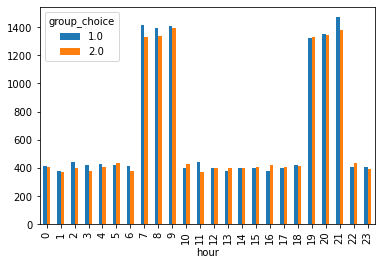

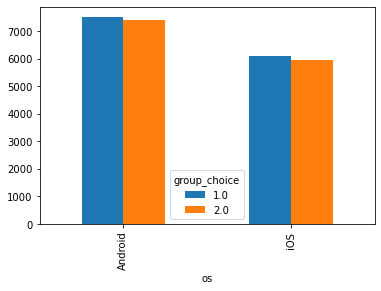

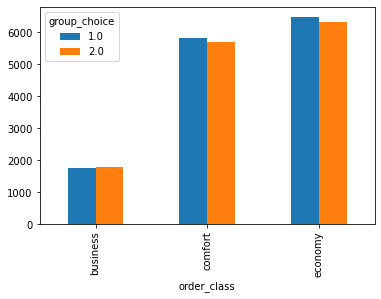

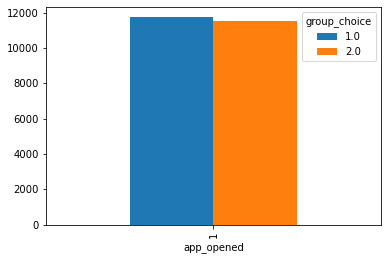

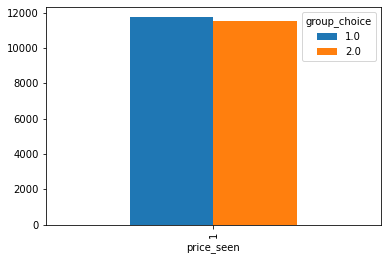

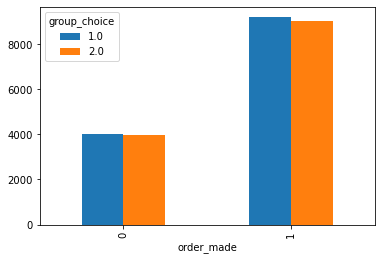

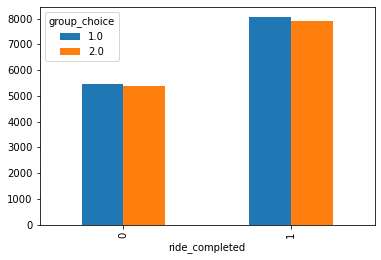

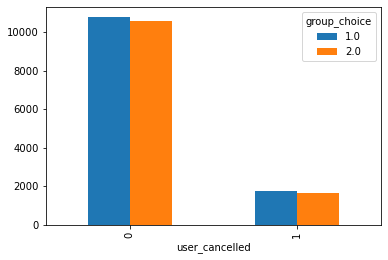

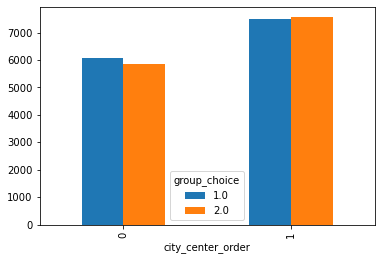

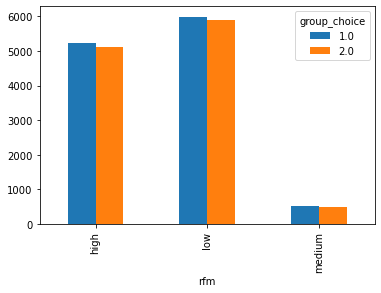

In [127]:
for column in ['hour', 'os', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='user_id',
        aggfunc='nunique'
    ).T.plot.bar();

In [129]:
ds_ranged = data_set.query(
    'group_choice > 0'
).sort_values(
    by='distance'
)

ds_ranged['n_rank'] = ds_ranged['distance'].rank(
    ascending=False, 
    method='average'
)

ds_ranged

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm,group_choice,n_rank
56017,56017,557088,20,iOS,economy,surge,1,1,1,1,0,0,0.010946,22,high,2.0,31643.0
66287,66287,342537,20,Android,economy,surge,1,1,1,1,0,1,0.030222,20,high,1.0,31642.0
30485,30485,753709,2,Android,economy,surge,1,1,1,1,0,0,0.042268,26,low,1.0,31641.0
99522,99522,658012,8,iOS,economy,surge,1,1,1,1,0,1,0.048325,24,low,1.0,31640.0
74490,74490,615616,0,Android,economy,surge,1,1,1,0,1,0,0.048850,26,high,2.0,31639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12268,12268,158828,4,iOS,business,surge,1,1,0,0,0,0,29.927395,29,low,2.0,5.0
34692,34692,851019,7,iOS,business,surge,1,1,1,1,0,1,30.482253,33,low,1.0,4.0
71069,71069,471754,9,Android,business,surge,1,1,1,1,0,1,30.694859,25,high,1.0,3.0
57821,57821,727927,21,Android,business,surge,1,1,1,0,1,1,31.475713,30,low,1.0,2.0


In [130]:
ds_overed = ds_ranged.groupby('group_choice').agg({
    'user_id':'count',
    'n_rank':'sum' 
})

ds_overed

,user_id,n_rank
group_choice,,
1.0,15984,254567818.0
2.0,15659,246087728.0


In [131]:
n1n2 = ds_overed.user_id[1] * ds_overed.user_id[2]



n1n1 = ds_overed.user_id[1] * (1 + ds_overed.user_id[1]) / 2

r1 = ds_overed.n_rank[1]


n2n2 = ds_overed.user_id[2] * (1 + ds_overed.user_id[2]) / 2

r2 = ds_overed.n_rank[2]



u1 = n1n2 + n1n1 - r1

u2 = n1n2 + n2n2 - r2


MU = min(u1, u2)

print(MU)

123477758.0


# ● Для устройств Android наблюдаем более высокие юзерские отмены

### Если добавить пуши для пользователей устройств Android, доля юзерских отмен уменьшится на 5%

In [133]:
quer = 'os == "Android"'

In [134]:
data_set['group_choice'] = data_set.query(quer)['user_id'].apply(
    lambda x: 1 if np.random.rand() > 0.5 else 2
)

In [135]:
ds_split = data_set.groupby(by=['os','group_choice']).agg({
    'user_id':'nunique',
    'hour':'mean',
    'app_opened':'mean',
    'price_seen':'mean',
    'order_made':'mean',
    'ride_completed':'mean',
    'user_cancelled':'mean',
    'city_center_order':'mean',
    'distance':'mean',
    'age':'mean'
}).T

ds_split['difference'] = round(
    ds_split[ds_split.columns[0]] / ds_split[ds_split.columns[1]] - 1
    ,3
)

print(f'По средним показателям выборки различаются от {ds_split.difference.min()} до {ds_split.difference.max()}')

display(ds_split)

По средним показателям выборки различаются от -0.007 до 0.02


os                      Android               difference
group_choice                1.0           2.0           
user_id            16799.000000  16782.000000      0.001
hour                  11.462240     11.537411     -0.007
app_opened             1.000000      1.000000      0.000
price_seen             0.883352      0.882163      0.001
order_made             0.684342      0.684397     -0.000
ride_completed         0.554394      0.554965     -0.001
user_cancelled         0.129948      0.129433      0.004
city_center_order      0.568431      0.557518      0.020
distance               5.375030      5.366247      0.002
age                   25.936868     25.969291     -0.001

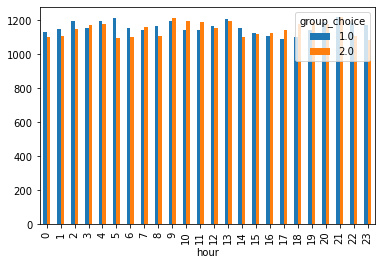

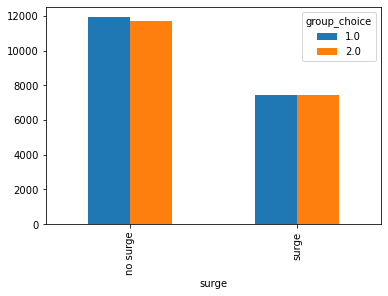

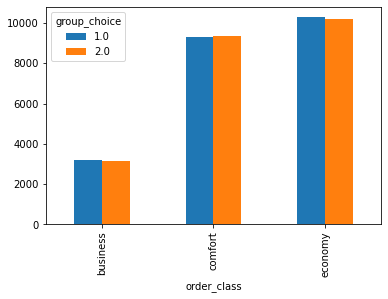

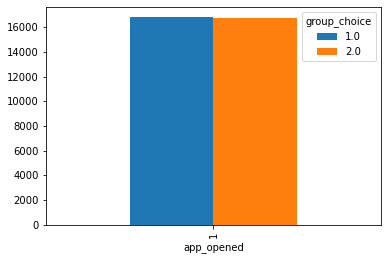

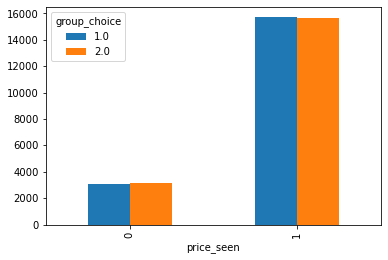

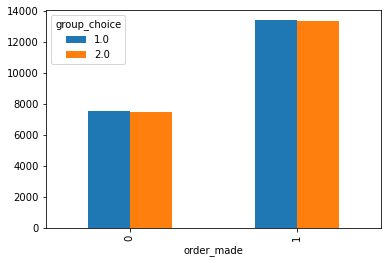

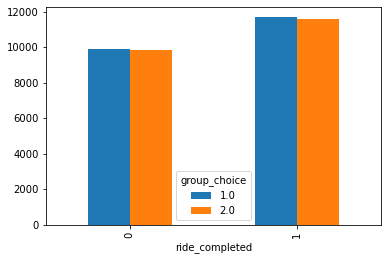

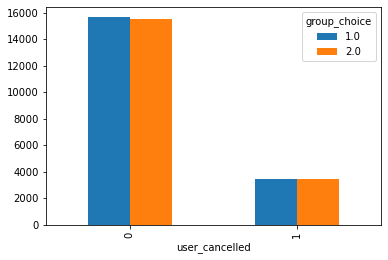

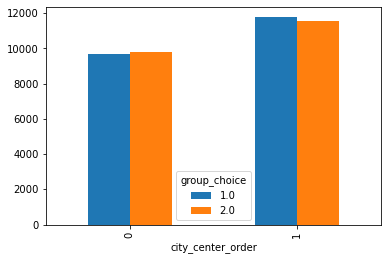

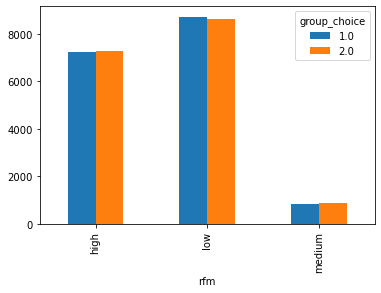

In [136]:
for column in ['hour', 'surge', 'order_class',
       'app_opened', 'price_seen', 'order_made', 'ride_completed',
       'user_cancelled', 'city_center_order', 'rfm']:
    data_set.pivot_table(
        index='group_choice',
        columns=column,
        values='user_id',
        aggfunc='nunique'
    ).T.plot.bar();

In [117]:
ds_ranged = data_set.query(
    'group_choice > 0'
).sort_values(
    by='distance'
)

ds_ranged['n_rank'] = ds_ranged['distance'].rank(
    ascending=False, 
    method='average'
)

ds_ranged

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm,group_choice,n_rank
94955,94955,850944,2,Android,economy,no surge,1,1,1,1,0,0,0.022687,18,high,2.0,50049.0
30734,30734,355050,18,Android,economy,no surge,1,1,1,0,1,1,0.025761,45,low,2.0,50048.0
66287,66287,342537,20,Android,economy,surge,1,1,1,1,0,1,0.030222,20,high,1.0,50047.0
92790,92790,291489,19,Android,economy,no surge,1,1,0,0,0,0,0.031468,23,high,2.0,50046.0
30485,30485,753709,2,Android,economy,surge,1,1,1,1,0,0,0.042268,26,low,2.0,50045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101465,101465,940677,5,Android,comfort,NaN,1,0,0,0,0,0,NaN,29,low,2.0,NaN
101467,101467,516750,4,Android,comfort,NaN,1,0,0,0,0,1,NaN,39,high,2.0,NaN
101469,101469,248955,6,Android,comfort,NaN,1,0,0,0,0,1,NaN,30,high,2.0,NaN
101474,101474,216082,22,Android,comfort,NaN,1,0,0,0,0,0,NaN,53,medium,1.0,NaN


In [118]:
ds_overed = ds_ranged.groupby('group_choice').agg({
    'user_id':'count',
    'n_rank':'sum' 
})

ds_overed

,user_id,n_rank
group_choice,,
1.0,28628,632698142.0
2.0,28068,619778083.0


In [119]:
n1n2 = ds_overed.user_id[1] * ds_overed.user_id[2]



n1n1 = ds_overed.user_id[1] * (1 + ds_overed.user_id[1]) / 2

r1 = ds_overed.n_rank[1]


n2n2 = ds_overed.user_id[2] * (1 + ds_overed.user_id[2]) / 2

r2 = ds_overed.n_rank[2]



u1 = n1n2 + n1n1 - r1

u2 = n1n2 + n2n2 - r2


MU = min(u1, u2)

print(MU)

577672967.0
